In [1]:
%load_ext autoreload

%autoreload 2

In [1]:
from reinforce import *
import numpy as onp

%matplotlib inline
import matplotlib.pyplot as plt

## $swf$ for 5 simulations, utilitarian

/Users/victorgallego/miniconda3/lib/python3.8/site-packages/jax-0.1.68-py3.8.egg/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


[[ 1.3162217 -1.332907 ]] [[ 1.274965 -1.276974]]
logits: [[ 0.81794155 -0.617942  ]] [[ 1.1051407 -0.9051416]] [[0.09716728 0.0673849  0.09075523 0.1446926 ]] [[0.09716728 0.0673849  0.09075523 0.1446926 ]]
mean SU: 2.146
mean tax1 0.24900001
mean tax2 0.24900001
logits: [[-0.3378801  2.3378818]] [[1.4696913 0.5303105]] [-1.1370857] [2.955432]
mean SU: 3.316
mean tax1 0.20330937
mean tax2 0.4079173
[[ 1.3939188 -1.4463911]] [[ 1.4025955 -1.373622 ]]
logits: [[ 1.0550184  -0.85501856]] [[ 0.7168    -0.5168005]] [[0.11687115 0.1005749  0.08074003 0.10181393]] [[0.11687115 0.1005749  0.08074003 0.10181393]]
mean SU: 2.22
mean tax1 0.24155001
mean tax2 0.24155001
logits: [[1.3245788  0.67542124]] [[0.47902587 1.5209732 ]] [0.36477393] [-1.3350413]
mean SU: 2.826
mean tax1 0.31300685
mean tax2 0.2695441
[[ 1.258116  -1.2827258]] [[ 1.3112856 -1.3503045]]
logits: [[-0.11707287  0.31707296]] [[ 0.90979695 -0.70979744]] [[0.07789804 0.12770978 0.11342864 0.08096358]] [[0.07789804 0.12770978 0

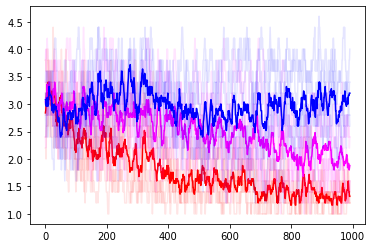

In [2]:
N_exps = 5
N = 1000

SUs = []

swf = utilitarian_swf

for i in range(N_exps):
    SUs.append([run_data_coop_game(i, swf,N=N), 
                run_data_coop_game_with_regulator(i, swf, N=N),
                run_data_coop_game_with_gaussian_regulator(i+55, swf,N=N)])
    
SUs = np.array(SUs)

colors = onp.asarray(['red', 'magenta', 'blue'])

smooth = 10
for i in range(3):
    for j in range(N_exps):
        plt.plot(np.convolve(SUs[j, i, :, 0], np.ones(smooth)/smooth, mode='valid'), color=colors[i], alpha=0.1)
    plt.plot(np.convolve(SUs.mean(axis=0)[i, :, 0], np.ones(smooth)/smooth, mode='valid'), color=colors[i])
    


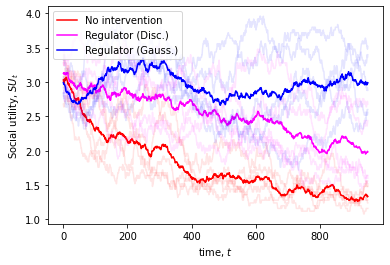

In [10]:

colors = onp.asarray(['red', 'magenta', 'blue'])

smooth = 50
for i in range(3):
    for j in range(N_exps):
        plt.plot(np.convolve(SUs[j, i, :, 0], np.ones(smooth)/smooth, mode='valid'), color=colors[i], alpha=0.1)
    plt.plot(np.convolve(SUs.mean(axis=0)[i, :, 0], np.ones(smooth)/smooth, mode='valid'), color=colors[i])
    plt.xlabel('time, $t$')
    plt.ylabel('Social utility, $SU_t$')
    
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='red'),
                Line2D([0], [0], color='magenta'),
                Line2D([0], [0], color='blue')]

plt.legend(custom_lines,['No intervention', 'Regulator (Disc.)', 'Regulator (Gauss.)'], loc=2);

## $swf$ for 5 simulations, rawlsian

In [11]:
N_exps = 5

SUs = []

swf = rawlsian_swf

for i in range(N_exps):
    SUs.append([run_data_coop_game(i, swf, N=1000), 
                run_data_coop_game_with_regulator(i, swf, N=1000), 
                run_data_coop_game_with_gaussian_regulator(i, swf, N=1000)])

[[ 1.3162217 -1.332907 ]] [[ 1.274965 -1.276974]]
logits: [[ 0.81794155 -0.617942  ]] [[ 1.1051407 -0.9051416]] [[0.09716728 0.0673849  0.09075523 0.1446926 ]] [[0.09716728 0.0673849  0.09075523 0.1446926 ]]
mean SU: 2.146
mean tax1 0.24900001
mean tax2 0.24900001
logits: [[0.31948438 1.6805143 ]] [[1.6542279  0.34577245]] [1.5447897] [0.12721261]
mean SU: 2.9320002
mean tax1 0.28125918
mean tax2 0.35905984
[[ 1.3939188 -1.4463911]] [[ 1.4025955 -1.373622 ]]
logits: [[ 1.0550184  -0.85501856]] [[ 0.7168    -0.5168005]] [[0.11687115 0.1005749  0.08074003 0.10181393]] [[0.11687115 0.1005749  0.08074003 0.10181393]]
mean SU: 2.22
mean tax1 0.24155001
mean tax2 0.24155001
logits: [[-0.02847741  2.0284758 ]] [[ 2.0519867  -0.05198485]] [-5.8797665] [3.2245538]
mean SU: 3.0779998
mean tax1 0.17917848
mean tax2 0.44959256
[[ 1.258116  -1.2827258]] [[ 1.3112856 -1.3503045]]
logits: [[-0.11707287  0.31707296]] [[ 0.90979695 -0.70979744]] [[0.07789804 0.12770978 0.11342864 0.08096358]] [[0.07789

In [12]:
for i in range(N_exps):
    SUs[i][2] = SUs[i][2].squeeze(-1)
SUs = np.array(SUs)

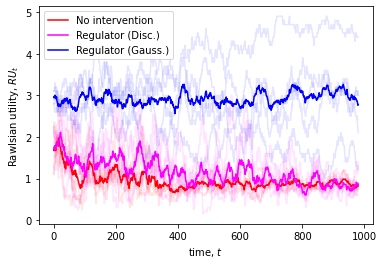

In [17]:
colors = onp.asarray(['red', 'magenta', 'blue'])

smooth = 20
for i in range(3):
    for j in range(N_exps):
        plt.plot(np.convolve(SUs[j, i, :], np.ones(smooth)/smooth, mode='valid'), color=colors[i], alpha=0.1)
    plt.plot(np.convolve(SUs.mean(axis=0)[i, :], np.ones(smooth)/smooth, mode='valid'), color=colors[i])
    plt.xlabel('time, $t$')
    plt.ylabel('Rawlsian utility, $RU_t$')
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='red'),
                Line2D([0], [0], color='magenta'),
                Line2D([0], [0], color='blue')]

plt.legend(custom_lines,['No intervention', 'Regulator (Disc.)', 'Regulator (Gauss.)'], loc=2);

## Further work

* Meta-learn the hyperparameters of R. Motivation: since he operates at a different scale, necesity of good learning rate. Another motivation: good for stabilty (several agents learning).

* Add state to the players